# My question is what percentage of good articles on the English Wikipedia have a "See also" section.
# First, let's collect the URLs of every good article on the English wikipedia.
# There are approximately 43,000 good articles out of approximately 7,000,000 total articles on the English Wikipedia.
# For information on what constitutes a good article, see en.wikipedia.org/wiki/WP:GACR

In [ ]:
import requests
import pandas as pd

url = "https://en.wikipedia.org/w/api.php"

params = {
    "action": "query",
    "list": "categorymembers",
    "cmtitle": "Category:Good articles",
    "cmlimit": 500, # Max size, but we will collect all ~43,000
    "format": "json"
}

headers = {
    "User-Agent": "StatisticsEducationBot/1.0 (Statistics Class Project; educational use)"
}

session = requests.Session()

all_titles = []
continue_token = True

# Collect all good articles
while continue_token:
    response = session.get(url=url, params=params, headers=headers)
    data = response.json()

    for page in data["query"]["categorymembers"]:
        all_titles.append(page["title"])

    if "continue" in data:
        params["cmcontinue"] = data["continue"]["cmcontinue"]
    else:
        continue_token = False

# Build df of good article titles
df = pd.DataFrame(all_titles, columns=["title"])
df

,title
0,? Nycticebus linglom
1,?Oryzomys pliocaenicus
2,.hack (video game series)
3,.hack//G.U.
4,*SCAPE building
...,...
42980,Zygoballus sexpunctatus
42981,Zygophyseter
42982,Zyklon B
42983,Zytglogge


In [44]:
import random as rand
import math
import scipy.stats as st

total_articles = 200
found = 0
search_for = "== See also =="
proportions = []
found_in_window = 0
sample_size = 5

for article in range(total_articles):
    titles = df['title'].tolist()
    # Select a random article title without replacement
    article_title = titles.pop(rand.randrange(len(titles)))

    params = {
        "action": "query",
        "titles": article_title,
        "prop": "extracts",
        "explaintext": True,
        "format": "json"
    }

    # Grab the article content
    data = session.get(url=url, params=params, headers=headers).json()
    pages = data['query']['pages']
    page_id = list(pages.keys())[0]
    content = pages[page_id].get('extract', 'No content available')

    # Check if "== See also ==" appears in the article content
    if search_for in content:
        found += 1
        found_in_window += 1
    
    if article % sample_size == (sample_size - 1):
        proportions.append(found_in_window / sample_size)
        found_in_window = 0

prob = found / total_articles
print("Percent of good articles that contain a See also section:", prob)

confidence = 0.95

z_score = st.norm.ppf(1 - (1 - confidence) / 2)
variance = prob * (1 - prob) / total_articles
fpc = (len(df) - total_articles) / (len(df) - 1)

error_1 = math.sqrt(variance)
error_2 = math.sqrt(variance * fpc) # Include finite population correction
moe_1 = z_score * error_1
moe_2 = z_score * error_2

print("Uncorrected standard error:", error_1)
print("Corrected standard error:", error_2)
print("Uncorrected margin of error:", moe_1)
print("Corrected margin of error:", moe_2)
print("Corrected 95 percent confidence interval: (" + str(prob - moe_2) + ", " + str(prob + moe_2) + ")")

Percent of good articles that contain a See also section: 0.37
Uncorrected standard error: 0.034139420030223126
Corrected standard error: 0.03406030191684546
Uncorrected margin of error: 0.06691203371232265
Corrected margin of error: 0.06675696505957768
Corrected 95 percent confidence interval: (0.3032430349404223, 0.4367569650595777)


# Let's also create a histogram of samples to check for normality.

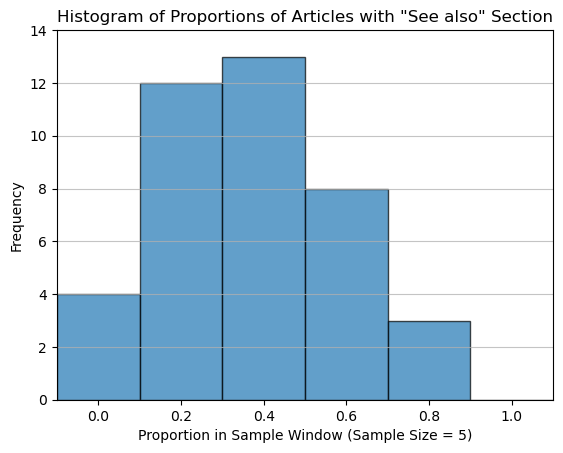

In [49]:
import matplotlib.pyplot as plt

# Plot histogram of proportions
plt.hist(proportions, bins=6, range=(-0.1,1.1), edgecolor='black', alpha=0.7)
plt.title('Histogram of Proportions of Articles with "See also" Section')
plt.xlabel('Proportion in Sample Window (Sample Size = 5)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xlim(-0.1, 1.1)
plt.ylim(0, 14)
plt.show()

# In conclusion, it appears that approximately 37.0% of good articles on the English Wikipedia contain a "See also" section.
# The margin of error for 95% confidence was approximately 6.68% (after applying the finite population correction).
# This makes us 95% confident that the true percentage is between 30.3% and 43.7%.
# The distribution is likely not normal according to the histogram, but the low sample size makes this uncertain.
# Thus, the margin of error and confidence interval may be incorrect.